# Проект: Линейные модели в машинном обучении

## Описание проекта

**Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».**

**Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!**

**Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:**

Первая будет прогнозировать возможный удой коровы (целевой признак Удой);

Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

**С помощью модели нужно отобрать коров по двум критериям:**

средний удой за год — не менее 6000 килограммов;

молоко должно быть вкусным.

## Загрузка данных

**Первым делом импортируем необходимые нам функции и библиотеки:**

In [49]:
import pandas as pd

In [50]:
import matplotlib.pyplot as plt

In [51]:
import numpy as np

In [52]:
import seaborn as sns

In [53]:
!pip install phik 
import phik

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
from sklearn.metrics import r2_score

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
from sklearn.metrics import recall_score

In [63]:
from sklearn.metrics import precision_score

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
from sklearn.metrics import precision_recall_curve

In [67]:
from sklearn.preprocessing import LabelEncoder

**Загрузим по очереди каждый датасет и посмотрим на данные в нем:**

In [68]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_main.rename(columns=str.lower, inplace=True)
display(ferma_main.head())
ferma_main.info()

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   удой, кг                               634 non-null    int64  
 2   эке (энергетическая кормовая единица)  634 non-null    float64
 3   сырой протеин, г                       634 non-null    int64  
 4   спо (сахаро-протеиновое соотношение)   634 non-null    float64
 5   порода                                 634 non-null    object 
 6   тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   жирность,%                             634 non-null    float64
 9   белок,%                                634 non-null    float64
 10  вкус молока                            634 non-null    object 
 11  возрас

In [69]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
ferma_dad.rename(columns=str.lower, inplace=True)
display(ferma_dad.head())
ferma_dad.info()

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [70]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
cow_buy.rename(columns=str.lower, inplace=True)
display(cow_buy.head())
cow_buy.info()

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность,%       20 non-null     float64
 5   текущий_уровень_белок,%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Переименуем столбцы:**

In [71]:
ferma_main = ferma_main.rename(columns={'удой, кг':'удой','эке (энергетическая кормовая единица)':'эке'
                                        ,'сырой протеин, г':'сырой_протеин'
                                        , 'спо (сахаро-протеиновое соотношение)':'спо'
                                        ,'тип пастбища':'тип_пастбища'
                                        ,'порода папы_быка':'порода_папы_быка'
                                        ,'жирность,%':'жирность'
                                        ,'белок,%':'белок'
                                        ,'вкус молока':'вкус_молока'})
ferma_main.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [72]:
ferma_dad = ferma_dad.rename(columns={'имя папы':'имя_папы'})
ferma_dad.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [73]:
cow_buy = cow_buy.rename(columns={'тип пастбища':'тип_пастбища'
                                  ,'порода папы_быка':'порода_папы_быка'
                                  ,'текущая_жирность,%':'текущая_жирность'
                                  ,'текущий_уровень_белок,%':'текущий_уровень_белок'})
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Теперь данные представленны в нормальном виде, и можно приступать к предобработке данных.**

##  Предобработка данных

**Проверим датасеты на наличие пропусков:**

In [74]:
ferma_main.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

In [75]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [76]:
cow_buy.isna().sum()

порода                   0
тип_пастбища             0
порода_папы_быка         0
имя_папы                 0
текущая_жирность         0
текущий_уровень_белок    0
возраст                  0
dtype: int64

**Как мы видим, во всех трех таблицах нет пропусков. Проверим их на дубликаты:**

In [77]:
ferma_main.duplicated().sum()

5

**В первой таблице мы видим 5 дубликов, можно удалить их:**

In [78]:
ferma_main = ferma_main.drop_duplicates()
ferma_main.duplicated().sum()

0

In [79]:
ferma_dad.duplicated().sum()

0

In [80]:
cow_buy.duplicated().sum()

4

**Во второй таблице не оказалось дубликатов, а в третьей их всего 4, их можно удалить:**

In [81]:
cow_buy = cow_buy.drop_duplicates()
cow_buy.duplicated().sum()

0

**Теперь проверим тип данных у каждого столбца каждого датафрейма:**

In [82]:
display(ferma_main.head())
ferma_main.info()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


**Перейдем к второй таблице:**

In [83]:
display(ferma_dad.head())
ferma_dad.info()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


**Перейдем к третьей таблице:**

In [84]:
display(cow_buy.head())
cow_buy.info()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   порода                 16 non-null     object 
 1   тип_пастбища           16 non-null     object 
 2   порода_папы_быка       16 non-null     object 
 3   имя_папы               16 non-null     object 
 4   текущая_жирность       16 non-null     float64
 5   текущий_уровень_белок  16 non-null     float64
 6   возраст                16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


**В ходе предобработки данных, мы проверили их на пропуски, удалили дубликаты, а также привели типы данных к их правильному значению.**

## Исследовательский анализ данных

**Посмотрим на распредение каждого количественного признака из первого датафрема:**

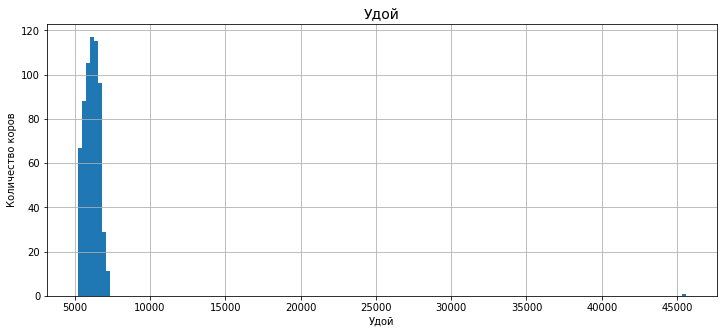

In [85]:
ferma_main['удой'].hist(bins=150, figsize=(12, 5));
plt.title('Удой', fontsize=14)
plt.xlabel('Удой')
plt.ylabel('Количество коров');

**Как мы видим на графике, у нас есть выброс после 45000 кг. Посмотрим сколько таких коров:**

In [86]:
ferma_main[ferma_main['удой']>45000].count()

id                  1
удой                1
эке                 1
сырой_протеин       1
спо                 1
порода              1
тип_пастбища        1
порода_папы_быка    1
жирность            1
белок               1
вкус_молока         1
возраст             1
dtype: int64

**Такая корова всего одна, поэтому эту запись можно удалить:**

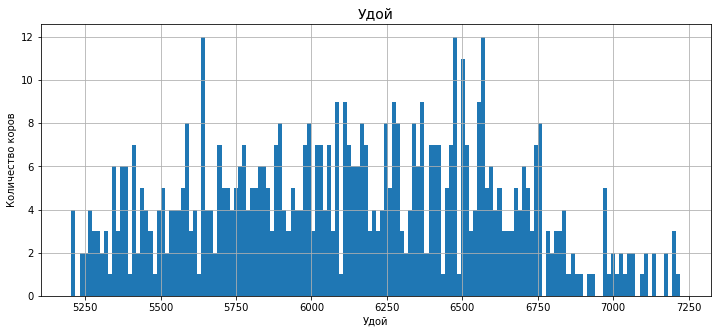

In [87]:
ferma_main = ferma_main[ferma_main['удой']<45000]
ferma_main['удой'].hist(bins=150, figsize=(12, 5));
plt.title('Удой', fontsize=14)
plt.xlabel('Удой')
plt.ylabel('Количество коров');

**Теперь мы видим график нормального распределения с несколькими пиками. Посмотрим на следующий признак:**

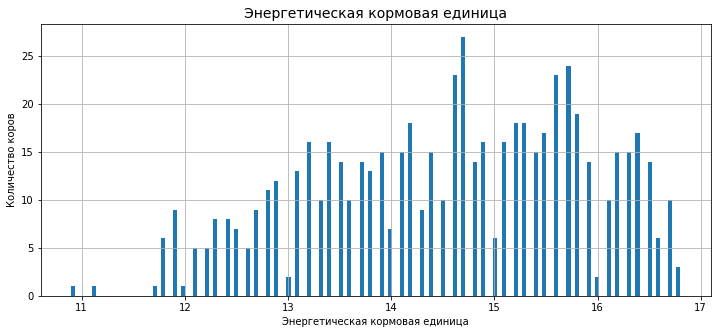

In [88]:
ferma_main['эке'].hist(bins=150, figsize=(12, 5));
plt.title('Энергетическая кормовая единица', fontsize=14)
plt.xlabel('Энергетическая кормовая единица')
plt.ylabel('Количество коров');

**На этом графике мы не видим аномалий. Перейдем к следующему признаку:**

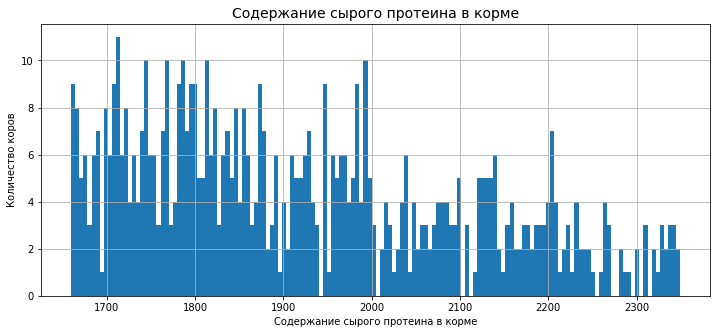

In [89]:
ferma_main['сырой_протеин'].hist(bins=150, figsize=(12, 5));
plt.title('Содержание сырого протеина в корме', fontsize=14)
plt.xlabel('Содержание сырого протеина в корме')
plt.ylabel('Количество коров');

**Тут также аномалии не наблюдаются. Двигаемся дальше:**

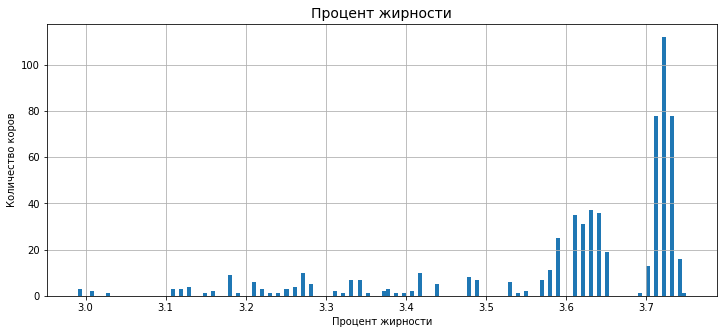

In [90]:
ferma_main['жирность'].hist(bins=150, figsize=(12, 5));
plt.title('Процент жирности', fontsize=14)
plt.xlabel('Процент жирности')
plt.ylabel('Количество коров');

**Тут данные распределены на отрезке от 2.9 до 3.8 процентов. Мы видем ярко выраженный пик после 3.7 процентов. Аномалий не наблюдается.**

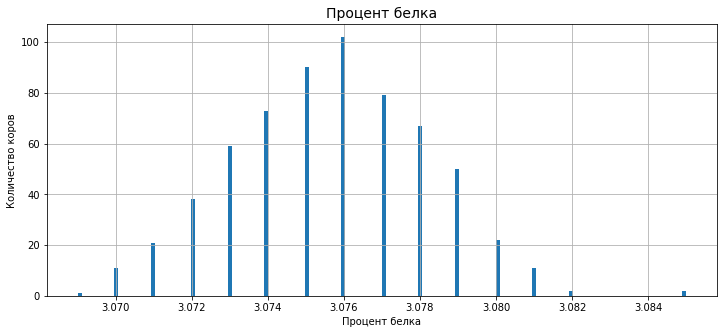

In [91]:
ferma_main['белок'].hist(bins=150, figsize=(12, 5));
plt.title('Процент белка', fontsize=14)
plt.xlabel('Процент белка')
plt.ylabel('Количество коров');

**Тут мы видим нормальное распределение.:**

**Напишем функцию, которая будет строить для каждого признака гистограмму и ящик с усами:**

In [92]:
def charts(df, column):

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=20)
    plt.title(f'Гистограмма для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Ящик с усами для {column}')
    plt.tight_layout()
    plt.show()

**Применим эту функцию для наших признаков:**

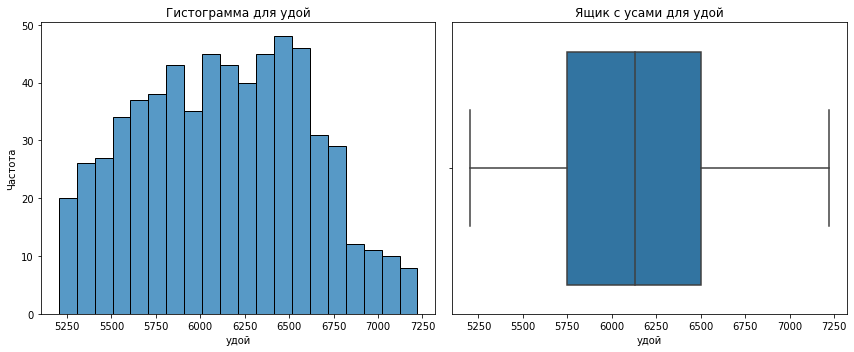

In [93]:
charts(ferma_main, 'удой')

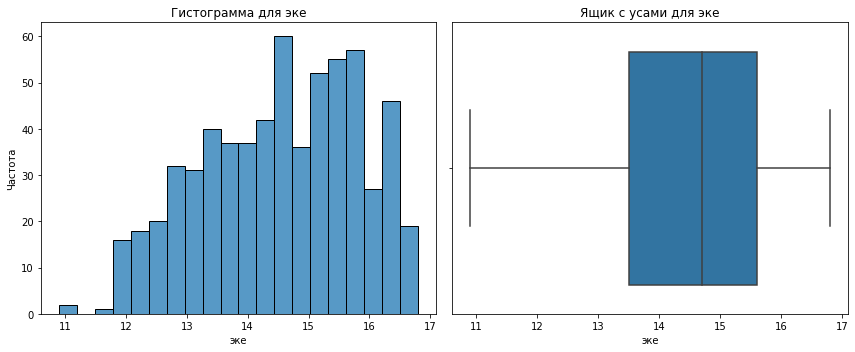

In [94]:
charts(ferma_main, 'эке')

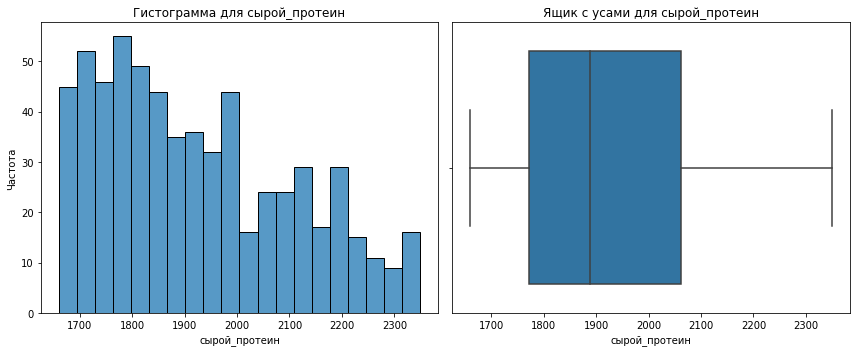

In [95]:
charts(ferma_main, 'сырой_протеин')

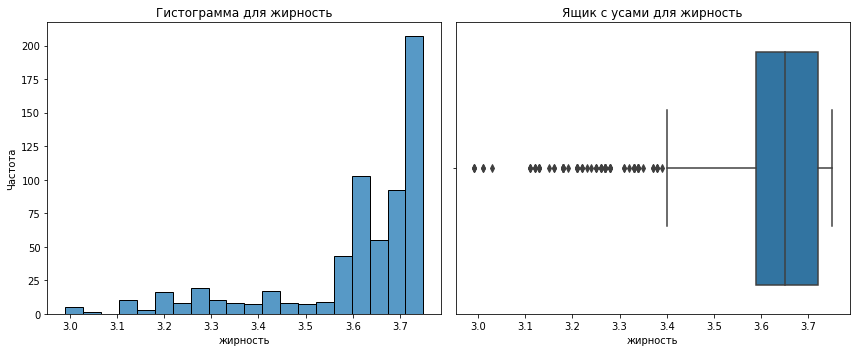

In [96]:
charts(ferma_main, 'жирность')

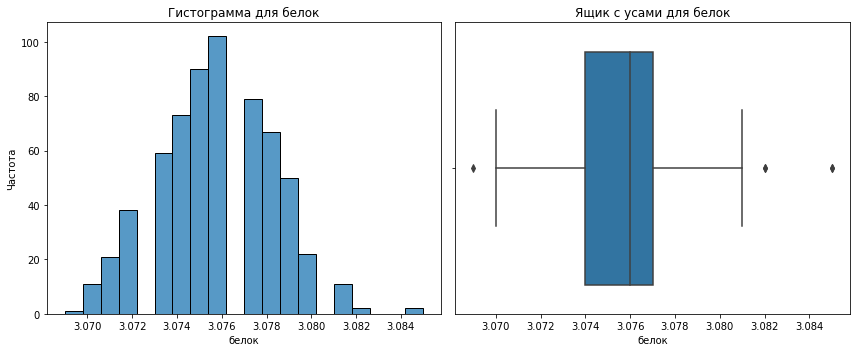

In [97]:
charts(ferma_main, 'белок')

**Перейдем к категориальным признакам:**

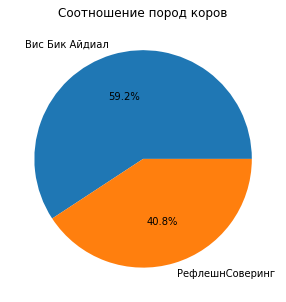

In [98]:
breed_counts = ferma_main['порода'].value_counts()
breed_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение пород коров')
plt.ylabel('')
plt.show()

**Мы видим, что у нас всего две породы, и одна занимает чуть менее 60 процентов от общего числа коров**

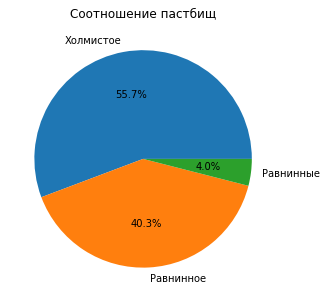

In [99]:
pasture_counts = ferma_main['тип_пастбища'].value_counts()
pasture_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение пастбищ')
plt.ylabel('')
plt.show()

**Видно, что есть 2 типа пастбищ: холмистое и равнинное. Однако мы видим что равнинное записано двуми способами, нужно исправить это:**

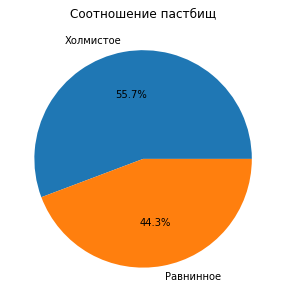

In [100]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('Равнинные', 'Равнинное')
pasture_counts = ferma_main['тип_пастбища'].value_counts()
pasture_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение пастбищ')
plt.ylabel('')
plt.show()

**Теперь у нас осталось два типа, холмистое занимает почти 56 процентов от общего числа**

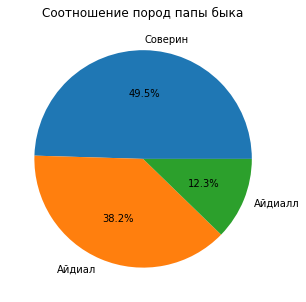

In [101]:
dad_pasture_counts = ferma_main['порода_папы_быка'].value_counts()
dad_pasture_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение пород папы быка')
plt.ylabel('')
plt.show()

**Тут схожая ситуация, две одинаковые породы написаны по разному, исправим это:**

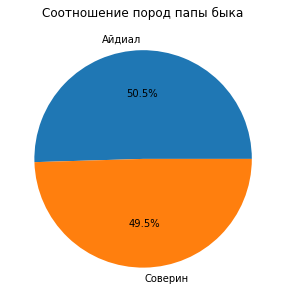

In [102]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].str.replace('Айдиалл', 'Айдиал')
dad_pasture_counts = ferma_main['порода_папы_быка'].value_counts()
dad_pasture_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение пород папы быка')
plt.ylabel('')
plt.show()

**Теперь мы видим практически равное отношение этих пород**

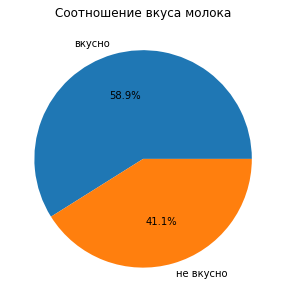

In [103]:
taste_counts = ferma_main['вкус_молока'].value_counts()
taste_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение вкуса молока')
plt.ylabel('')
plt.show()

**Большая часть коров дает вкусное молоко**

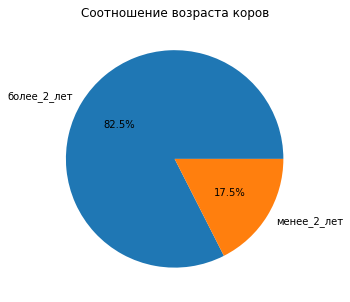

In [104]:
age_counts = ferma_main['возраст'].value_counts()
age_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение возраста коров')
plt.ylabel('')
plt.show()

**Более 80 процентов коров страше двух лет**

**Проверим столбец id на наличие дубликатов:**

In [105]:
ferma_main['id'].duplicated().sum()

0

**На этом мы закончили с первым датафремом, перейдем ко второму:**

**Начнем с проверки колонки id на дубликаты**

In [106]:
ferma_dad['id'].duplicated().sum()

0

**Посмотрим на столбец имя папы:**

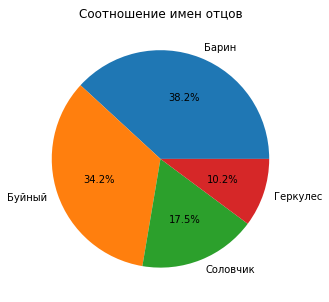

In [107]:
dad_name_counts = ferma_dad['имя_папы'].value_counts()
dad_name_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение имен отцов')
plt.ylabel('')
plt.show()

**Тут все хорошо, нет неявно выраженных дубликатов. Можно переходить к третьему датафрему:**

**Начнем с количественных переменных:**

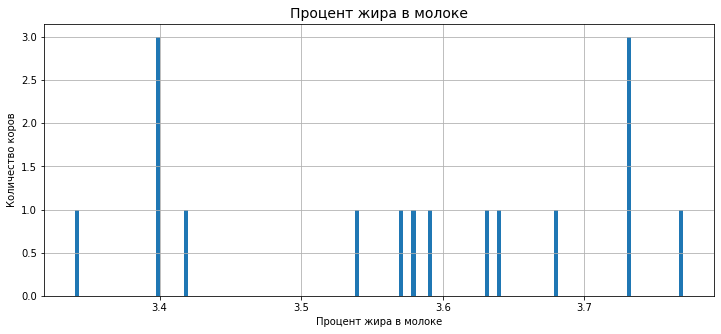

In [108]:
cow_buy['текущая_жирность'].hist(bins=150, figsize=(12, 5));
plt.title('Процент жира в молоке', fontsize=14)
plt.xlabel('Процент жира в молоке')
plt.ylabel('Количество коров');

**Также как в первом датафрейме процент жира распределен в границах одного процента, есть два явно выраженных пика около 3.4 и после 3.7**

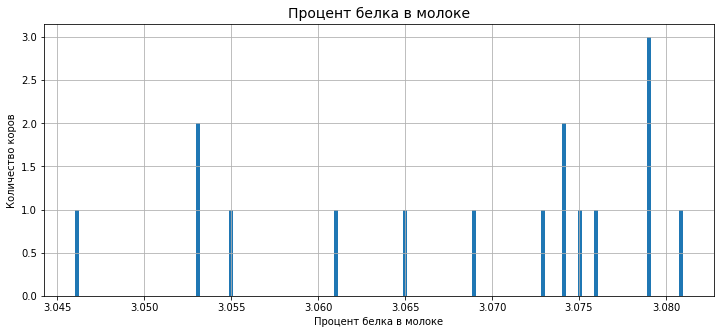

In [109]:
cow_buy['текущий_уровень_белок'].hist(bins=150, figsize=(12, 5));
plt.title('Процент белка в молоке', fontsize=14)
plt.xlabel('Процент белка в молоке')
plt.ylabel('Количество коров');

**Анологичная картина с содержанием белка, есть пик около 3.08 процента**

**Перейдем к категориальным признакам:**

In [110]:
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


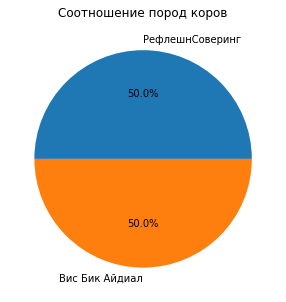

In [111]:
cow_breed_counts = cow_buy['порода'].value_counts()
cow_breed_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение пород коров')
plt.ylabel('')
plt.show()

**Абсолютно равное отношение, идем дальше:**

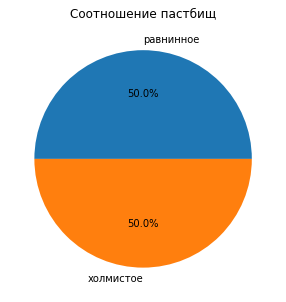

In [112]:
cow_pasture_counts = cow_buy['тип_пастбища'].value_counts()
cow_pasture_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение пастбищ')
plt.ylabel('')
plt.show()

**Снова абсолютно равное отношение! Это отлично, можно двигаться дальше:**

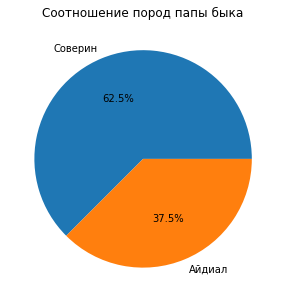

In [113]:
cow_dad_breed_counts = cow_buy['порода_папы_быка'].value_counts()
cow_dad_breed_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение пород папы быка')
plt.ylabel('')
plt.show()

**Две породы, никаких дубликатов. Следующий признак:**

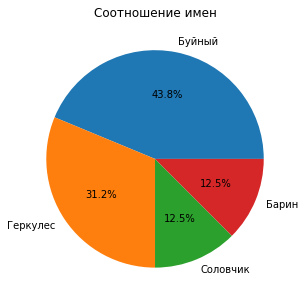

In [114]:
cow_dad_name_counts = cow_buy['имя_папы'].value_counts()
cow_dad_name_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение имен')
plt.ylabel('')
plt.show()

**Опять никаких дубликатов, перейдем к последнему признаку:**

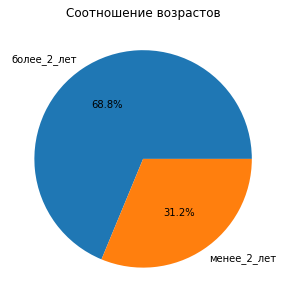

In [115]:
cow_age_counts = cow_buy['возраст'].value_counts()
cow_age_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение возрастов')
plt.ylabel('')
plt.show()

**И тут все хорошо, никаких дубликатов.**

**В ходе иследовательского анализа данных, мы обаружили и обработали выбросы, столкнулись и необычным распределением количественных пременных(процент жира и процент белка).**

## Корреляционный анализ

**Проведем корреляционный анализ признаков в датасете ferma_main.**

**Для начала постороим матрицу корреляции между всеми признаками:**

interval columns not set, guessing: ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


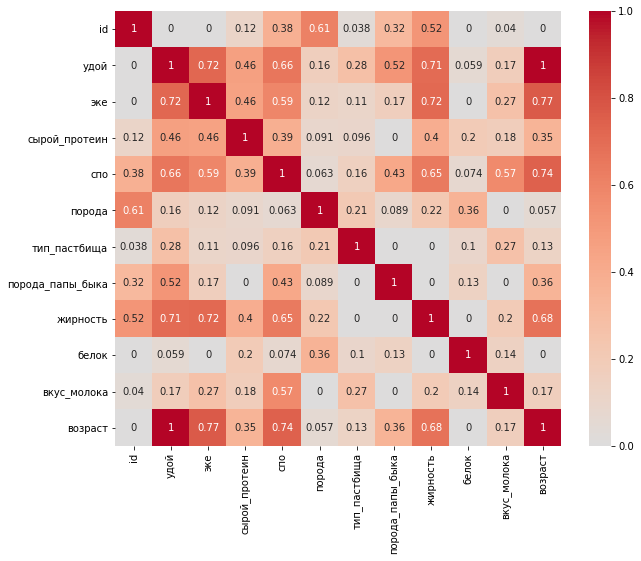

In [116]:
phik_matrix = ferma_main.phik_matrix()
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

**Мы видим, что больше всех целевой признак удой коррелирует с признаками возраст, жирность, эке**

**Рассмотрим отдельно корреляцию каждого количественного признака с признаком удой. Для этого постороим диаграммы рассеяния**

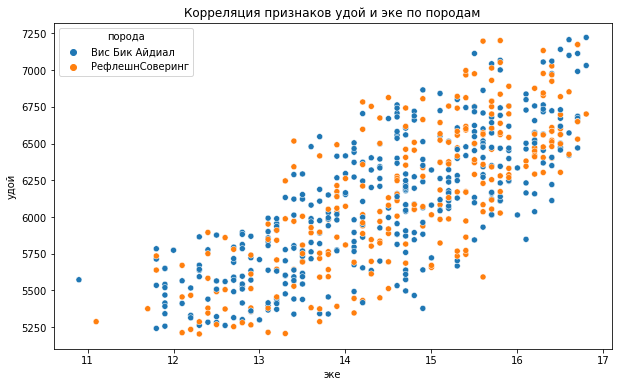

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ferma_main, x='эке', y='удой', hue='порода')
plt.title('Корреляция признаков удой и эке по породам');

**Мы видим, что с обоими пород сильная линейная свзяь целевого признака**

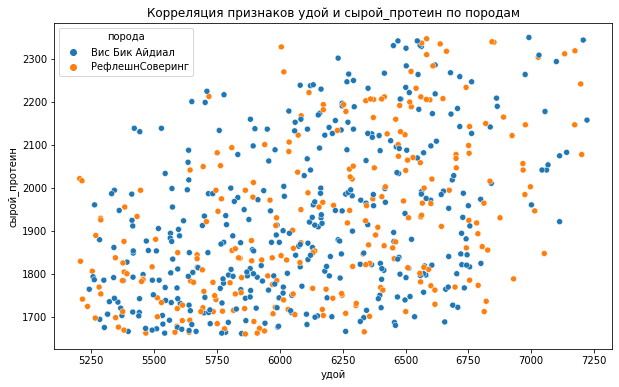

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ferma_main, x='удой', y='сырой_протеин', hue='порода')
plt.title('Корреляция признаков удой и сырой_протеин по породам');

**Тут заметно намного более низкий уровень линейной связи, отрожающийся в равной степени на обоих породах**

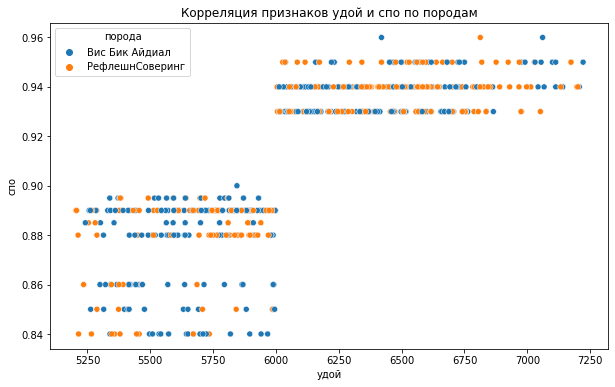

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ferma_main, x='удой', y='спо', hue='порода')
plt.title('Корреляция признаков удой и спо по породам');

**На этом необычном графике видна сильная свзяь по обоим породам. До того как удой преодалевает отметку в 6000 кг график находится внизу, но резко возрастает после 6000. Таким образом, связь присутствует, но не линейнаая.**

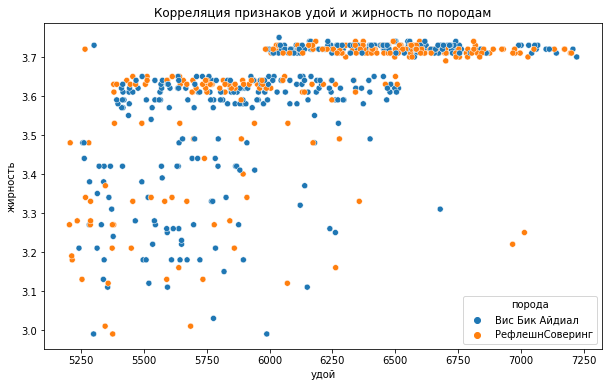

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ferma_main, x='удой', y='жирность', hue='порода')
plt.title('Корреляция признаков удой и жирность по породам');

**Этот график напоминает предыдущий, однако тут связь не такая сильная, но обе породы ведут себя одинаково**

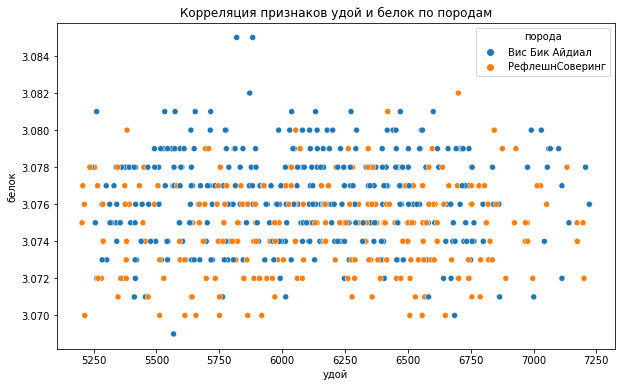

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ferma_main, x='удой', y='белок', hue='порода')
plt.title('Корреляция признаков удой и белок по породам');

**На этом графике мы также видим логическую регрессию, однако уровень свзяи настолько низок, что ее почти нет**

**Признак id мы учитывать не будем, т.к. он никак не связан с конкретными признаками коровы, а приписывается по очередно каждой корове и не коррелирует с целевым признаком**

**Подводя итоги, можно сказать что признаки эке и сырой_протеин имеют линейную регрессию, а признаки спо, жирность и белок имеют логическую регрессию. Мы обнаружили несколько нелинейных связей, мультиколлинеарность (сильная линейная взаимосвязь между вхоными признаками) отсутствует.**

## Обучение модели линейной регрессии

### **1. Обучение первой модели линейной регресии.**

**Для начала отберем целевой и входные признаки. Входными признаками будут: порода, порода_папы_быка, возраст, эке, сырой_протеин, тип_пастбища**

In [122]:
RANDOM_STATE = 42

X = ferma_main.drop(['удой','id', 'жирность', 'белок', 'вкус_молока'], axis=1)
y = ferma_main['удой']

**Разобьем данные на тренировочные и тестовые выборки:**

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

**Закодируем категориальные переменные:**

In [124]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

**Масштабируем количественные признаки:**

In [125]:
num_col_names = [ 'спо','эке', 'сырой_протеин']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

**Объединим кодированные и масштабированные данных в тренировочный и тестовый датафрейм:**

In [126]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

**Обучим модель на подготовленных объедененных данных:**

In [127]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

**Оценим качество модели, посчитав R²:**

In [128]:
r1 = r2_score(y_test, predictions)
print("R2 =", r1)

R2 = 0.7844078173416966


**Построим графики остатков:**

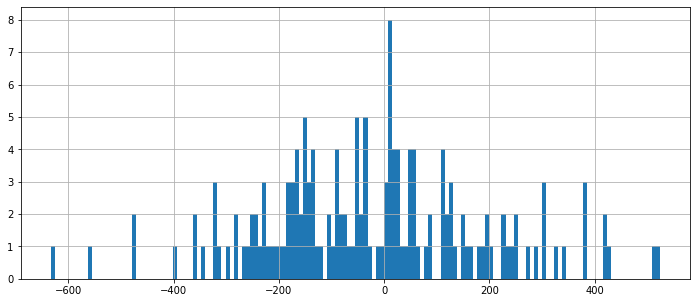

In [129]:
residuals = y_test - predictions
residuals.hist(bins=150, figsize=(12,5));

**Мы видим нормальное несмещенное распрделение с центром около нуля, одна присутсвуют аномалии в виде пиков.**

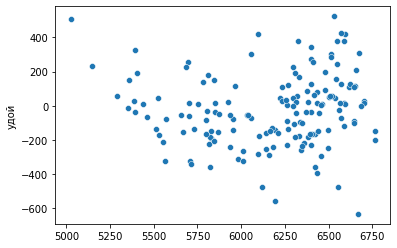

In [130]:
sns.scatterplot(x=predictions, y=residuals);

**На графике разброса мы видим непостоянство дисперсии.**

**Резюмируя оценки нашей модели, еще есть куда стремиться! Она предсказывает правильно лишь в 78% случаев, а ее графики остатков говрят о том, что модель нужно дорабатывать. Займемся этим.**

### **2. Обучение второй модели линейной регрессии**

**На этапе корреляционного анализа мы обнаружили, что между целевым признаком и признаками спо и эке нелинейная связь. Исправим это**

**Вспомним график связи удой и спо:**

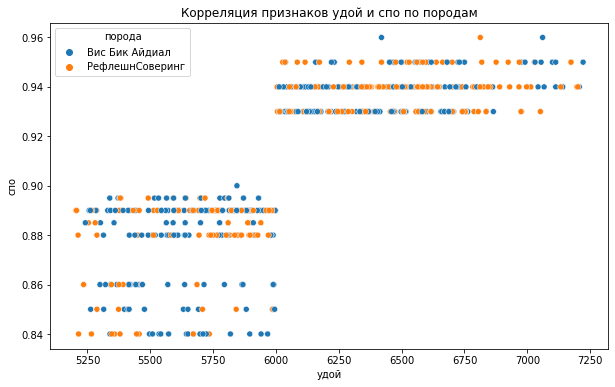

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ferma_main, x='удой', y='спо', hue='порода')
plt.title('Корреляция признаков удой и спо по породам');

**Видно, что между двумя кластерами проходит граница на 6000 кг. Перобразуем этот признак в бинарный категориальный:**

In [132]:
def convert_to_binary(df, column1, threshold=0.92):
    df[column1 + '_binary'] = df[column1].apply(lambda x: 1 if x > threshold else 0)
    return df
ferma_main = convert_to_binary(ferma_main, 'спо')
ferma_main.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_binary
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0


**Теперь у нас добавился столбец с нулями и единицами, который убирает нелинейность**

**График удой и эке:**

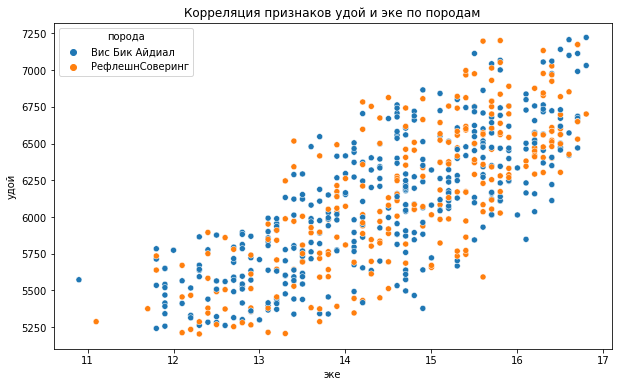

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ferma_main, x='эке', y='удой', hue='порода')
plt.title('Корреляция признаков удой и эке по породам');

**На нем видна линейная связь, но чтобы следовать условиям задачи возведем эке в квадрат чтобы убрать нелинейность:**

In [134]:
ferma_main['эке_квадрат'] = ferma_main['эке'] * ferma_main['эке']

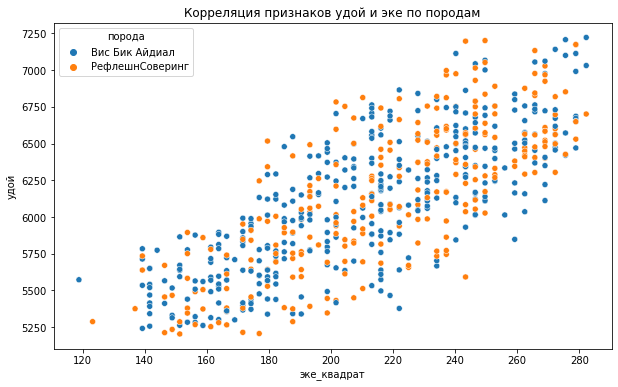

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ferma_main, x='эке_квадрат', y='удой', hue='порода')
plt.title('Корреляция признаков удой и эке по породам');

**Таким образом мы немного выравнили график**

**Теперь заново обучим вторую модель:**

In [136]:
X = ferma_main.drop(['удой','id', 'спо', 'эке', 'жирность', 'белок', 'вкус_молока'], axis=1)
y = ferma_main['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_binary']
num_col_names = ['эке_квадрат', 'сырой_протеин']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr2  = LinearRegression()
model_lr2.fit(X_train, y_train)
predictions2 = model_lr2.predict(X_test)

r2 = r2_score(y_test, predictions2)
print("R2 =", r2)


R2 = 0.8180879926867501


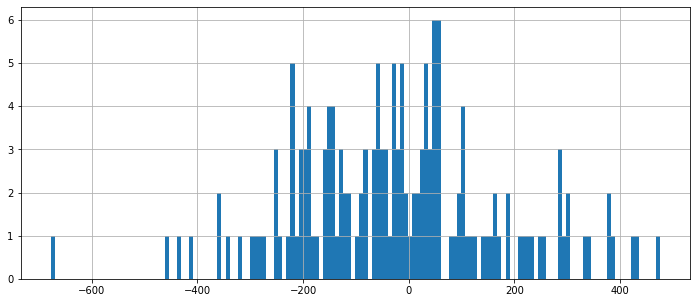

In [137]:
residuals2 = y_test - predictions2
residuals2.hist(bins=150, figsize=(12,5));

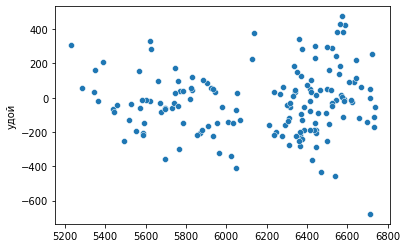

In [138]:
sns.scatterplot(x=predictions2, y=residuals2);

**Теперь наша модель предсказывает правильно 83% ответов. Это уже лучше. На первом графике мы также видим выбросы, а на втором непостоянство дисперсии на середине графика. Нужно добавить в модель новые данные.**

### **3. Обучение третьей модели**

**Из датафрейма ferma_dad добавим признк имя_папы соединив его с остальными данными по ключу**

In [139]:
ferma_main_dad = pd.merge(ferma_main, ferma_dad, on='id')
ferma_main_dad.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_binary,эке_квадрат,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


**Посмотрим на график корреляции и найдем ее коэфицент между целевым и новым признаком:**

interval columns not set, guessing: ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок', 'спо_binary', 'эке_квадрат']


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_binary,эке_квадрат
id,1.000000,0.000000,0.000000,0.115822,0.382303,0.611843,0.037776,0.320977,0.519949,0.000000,0.039659,0.000000,0.000000,0.000000
удой,0.000000,1.000000,0.720719,0.463224,0.661359,0.164744,0.279540,0.519915,0.707654,0.058970,0.173122,0.998101,0.999947,0.722116
эке,0.000000,0.720719,1.000000,0.456484,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596,0.900428,0.979902
сырой_протеин,0.115822,0.463224,0.456484,1.000000,0.387188,0.090925,0.096474,0.000000,0.397380,0.202474,0.176480,0.351685,0.537071,0.451582
спо,0.382303,0.661359,0.591190,0.387188,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410,1.000000,0.584376
порода,0.611843,0.164744,0.123086,0.090925,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295,0.028933,0.074709
тип_пастбища,0.037776,0.279540,0.106758,0.096474,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455,0.143022,0.148222
порода_папы_быка,0.320977,0.519915,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817,0.407797,0.152239
жирность,0.519949,0.707654,0.715914,0.397380,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913,0.922373,0.714925
белок,0.000000,0.058970,0.000000,0.202474,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000,0.000000,0.000000


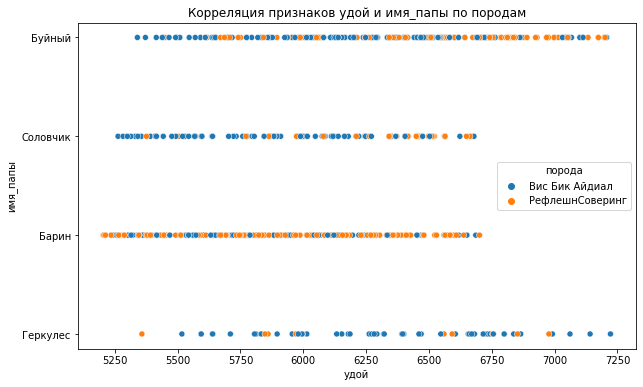

In [140]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ferma_main_dad, x='удой', y='имя_папы', hue='порода')
plt.title('Корреляция признаков удой и имя_папы по породам');
ferma_main.phik_matrix()

**Теперь обучим третью модель по данным из этого датафрема:**

In [141]:
X = ferma_main_dad.drop(['удой','id', 'спо', 'эке', 'жирность', 'белок', 'вкус_молока'], axis=1)
y = ferma_main_dad['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_binary', 'имя_папы']
num_col_names = ['эке_квадрат', 'сырой_протеин']


encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr3  = LinearRegression()
model_lr3.fit(X_train, y_train)
predictions3 = model_lr3.predict(X_test)

r3 = r2_score(y_test, predictions3)
print("R2 =", r2)

R2 = 0.8180879926867501


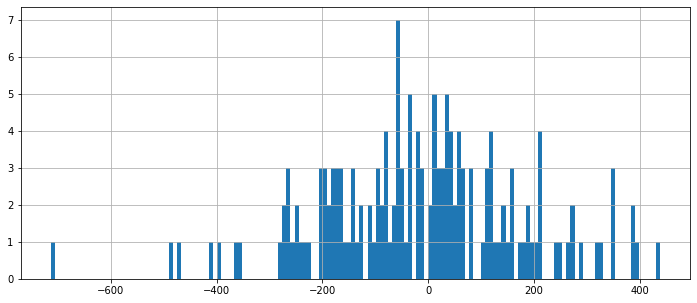

In [142]:
residuals3 = y_test - predictions3
residuals3.hist(bins=150, figsize=(12,5));

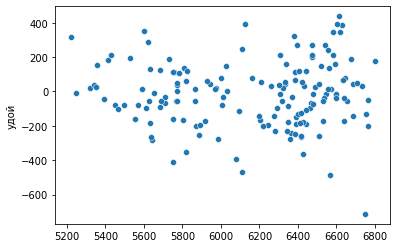

In [143]:
sns.scatterplot(x=predictions3, y=residuals3);

**Эта модель предсказывает чуть лучше, на графике остатков не такие явные выбросы, однако его центр немного сместился. Расчитаем для каждой модели три метрики: MSE, MAE, RMSE.**

**Для первой модели:**

In [144]:
mae1 = mean_absolute_error(y_test, predictions)
mse1 = mean_squared_error(y_test, predictions) 
rmse1 = mean_squared_error(y_test, predictions, squared=False)

**Для второй модели:**

In [145]:
mae2 = mean_absolute_error(y_test, predictions2)
mse2 = mean_squared_error(y_test, predictions2) 
rmse2 = mean_squared_error(y_test, predictions2, squared=False)

**Для третьей модели:**

In [146]:
mae3 = mean_absolute_error(y_test, predictions3)
mse3 = mean_squared_error(y_test, predictions3) 
rmse3 = mean_squared_error(y_test, predictions3, squared=False)

In [147]:
def metrics (test, pred):
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred) 
    rmse = mean_squared_error(test, pred, squared=False)
    return (mae, mse, rmse)
metrics(y_test, predictions)

(164.24194463474927, 43887.01500966052, 209.49227911706083)

In [148]:
metrics_data = {
    'DataFrame': ['Модель 1', 'Модель 2', 'Модель 3'],
    'MAE': [mae1, mae2, mae3],
    'MSE': [mse1, mse2, mse3],
    'RMSE': [rmse1, rmse2, rmse3],
    'R^2': [r1, r2, r3]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,DataFrame,MAE,MSE,RMSE,R^2
0,Модель 1,164.241945,43887.015010,209.492279,0.784408
1,Модель 2,149.039652,37030.911311,192.434174,0.818088
2,Модель 3,146.163024,35673.889886,188.875329,0.824754


**Метрики указывают на то, что третья модель лучшая. Посчитаем доверительный интервал для нее:**

In [149]:
np.quantile(predictions3, 0.025) , np.quantile(predictions3, 0.975)

(5351.318280574307, 6749.077628641808)

### **4. Получение прогноза.**

**С помощью третьей модели спрогнозируем удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.**

**Нужно добавить в таблицу недостающие признаки: эке, сырой_протеин и спо. Для этого возьмем средние значения и увличим на 5%:**

In [150]:
eke_mean = ferma_main_dad['эке'].mean()
eke_mean = eke_mean * 1.05
eke_mean

15.276162420382162

In [151]:
protein_mean = ferma_main_dad['сырой_протеин'].mean()
protein_mean = protein_mean * 1.05
protein_mean

2019.9475318471339

In [152]:
spo_mean = ferma_main_dad['спо'].mean()
spo_mean = spo_mean * 1.05
spo_mean

0.9587436305732484

**Добавим недостающие признаки:**

In [153]:
cow_buy_new = cow_buy
cow_buy_new['эке'] = eke_mean
cow_buy_new['сырой_протеин'] = protein_mean
cow_buy_new['спо'] = spo_mean

**Переиминуем некоторые столбы:**

In [154]:
cow_buy_new = cow_buy_new.rename(columns={'текущая_жирность':'жирность','текущий_уровень_белок':'белок'})

**Также добавим столбцы с бинарным обозначением спо и эке в квадрате:**

In [155]:
cow_buy_new['эке_квадрат'] = cow_buy_new['эке'] * cow_buy_new['эке']
cow_buy_new['спо_binary'] = 1

**Также перепишем тип пастбища с заглавной буквы:**

In [156]:
cow_buy_new['тип_пастбища'] = cow_buy_new['тип_пастбища'].str.capitalize()
cow_buy_new.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,эке_квадрат,спо_binary
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1


**Тепреь применим нашу модель к этому датафрейму:**

In [157]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_binary', 'имя_папы']
num_col_names = ['эке_квадрат', 'сырой_протеин']


cow_buy_new_ohe = encoder.transform(cow_buy_new[cat_col_names])

encoder_col_names = encoder.get_feature_names()

cow_buy_new_scaled = scaler.transform(cow_buy_new[num_col_names])

cow_buy_new_ohe = pd.DataFrame(cow_buy_new_ohe, columns=encoder_col_names)

cow_buy_new_scaled = pd.DataFrame(cow_buy_new_scaled, columns=num_col_names)

cow_buy_new_final = pd.concat([cow_buy_new_ohe, cow_buy_new_scaled], axis=1)

predictions4 = model_lr3.predict(cow_buy_new_final)

print(predictions4)

[6609.91929681 6378.71102836 6283.99977532 6593.08937654 6542.14606633
 6425.38021759 6571.25973712 6400.54066779 6344.70785976 6617.92892634
 6609.91929681 6127.4747423  6593.08937654 6344.70785976 6425.38021759
 6571.25973712]


**Мы получили прогноз на удой коров, которых фермер хочет купить. Для этого мы использовали третью модель.**

## Обучение модели логистической регрессии

**Теперь нам предстоит обучить модель логической регрессии для предсказания вкуса молока. В качестве целевого признака выступает вкус_молока. У нас уже подготовленный датафрейм ferma_main_dad, на нем мы и будем производить обучение и тестирование модели. По совету ментора, будем использовать кодировщик LabelEncoder, чтобы не возникло путаницы с классами:**

In [158]:
X = ferma_main_dad.drop(['id', 'вкус_молока', 'порода_папы_быка', 'имя_папы', 'порода', 'удой'], axis=1)
y = ferma_main_dad['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = [ 'тип_пастбища', 'возраст', 'спо_binary']
num_col_names = ['эке_квадрат', 'сырой_протеин','эке', 'жирность', 'белок', 'спо']


le = LabelEncoder()
le.fit(y_train)

le.classes_[0], le.classes_[1] = le.classes_[1], le.classes_[0]

y_train = le.transform(y_train)
y_test = le.transform(y_test)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

**Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision:**

In [159]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('Accuracy:', acc, 'Recall:', recall, 'Precision:', precision)

Accuracy: 0.6496815286624203 Recall: 0.875 Precision: 0.6363636363636364


**Построим матрицу ошибок:**

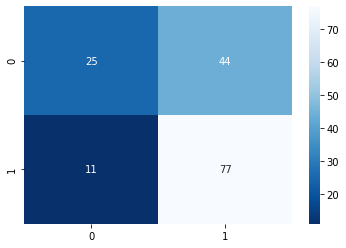

In [160]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

**Глядя на значение оценок мы видим, что модель правильно предсказывает верно в 68% случаев, однако редко присвает класс "вкусно" заведомо не вкусному молоку. Но лишь в 68% случаев вкусное молоко она предсказала как вкусное.**

**Для нас важнее ошибка первого рода, т.к. лучше не купить корову с вкусным молоком, чем купить корову с не вкусным. Нам нужно свести критичную ошибку первого рода к нулю, для этого напишем цикл, который будет изменять пороговое значение до тех пор, пока метрика precision не станет равна 1 (что и будет означать отсутствие ошибки первого рода):**

In [161]:
y_probs = clf.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.5, 1, 0.01)

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f'Threshold: {threshold:.2f}, Accuracy: {acc:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}')
    
    if precision == 1:
        print(f'Остановлено на пороге: {threshold:.2f}')
        break

Threshold: 0.50, Accuracy: 0.6497, Recall: 0.8750, Precision: 0.6364
Threshold: 0.51, Accuracy: 0.6688, Recall: 0.8750, Precision: 0.6525
Threshold: 0.52, Accuracy: 0.6879, Recall: 0.8750, Precision: 0.6696
Threshold: 0.53, Accuracy: 0.6943, Recall: 0.8750, Precision: 0.6754
Threshold: 0.54, Accuracy: 0.7070, Recall: 0.8750, Precision: 0.6875
Threshold: 0.55, Accuracy: 0.6943, Recall: 0.8523, Precision: 0.6818
Threshold: 0.56, Accuracy: 0.7261, Recall: 0.8523, Precision: 0.7143
Threshold: 0.57, Accuracy: 0.7261, Recall: 0.8409, Precision: 0.7184
Threshold: 0.58, Accuracy: 0.7261, Recall: 0.8409, Precision: 0.7184
Threshold: 0.59, Accuracy: 0.7389, Recall: 0.8409, Precision: 0.7327
Threshold: 0.60, Accuracy: 0.7197, Recall: 0.8068, Precision: 0.7245
Threshold: 0.61, Accuracy: 0.7070, Recall: 0.7727, Precision: 0.7234
Threshold: 0.62, Accuracy: 0.7197, Recall: 0.7500, Precision: 0.7500
Threshold: 0.63, Accuracy: 0.7006, Recall: 0.6932, Precision: 0.7531
Threshold: 0.64, Accuracy: 0.6879,

**Мы видим как менялись метрики пока наш цикл пробегал значения, остановился он на 0.78. Убедимся в отсутвии ошибки первого рода:**

Accuracy: 0.5477707006369427 Recall: 0.19318181818181818 Precision: 1.0


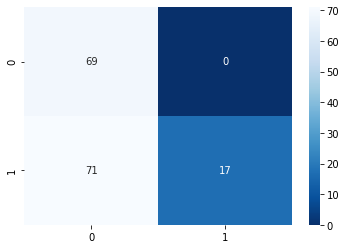

In [162]:
optimal_threshold = 0.78
y_pred = (y_probs >= optimal_threshold).astype(int)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('Accuracy:', acc, 'Recall:', recall, 'Precision:', precision)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

**Построим график, на котором увидим как изменяется precision в зависимости от значения Threshold:**

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined a

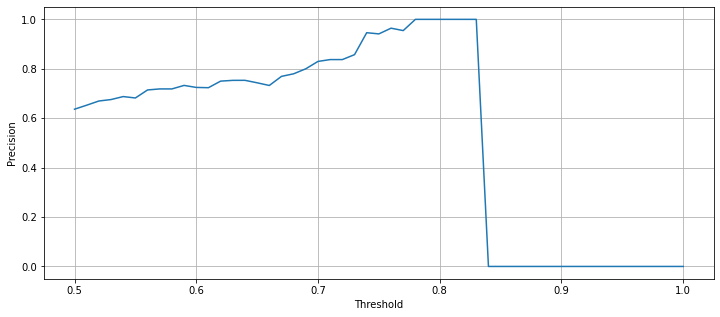

In [163]:
thresholds = np.arange(0.5, 1.01, 0.01)
precisions = []

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)
plt.figure(figsize=(12, 5))
plt.plot(thresholds, precisions)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

**Как видно из графика, precision держится на единице от 0.78 до примерно 0.83**

**Теперь применим модель к датасету cow_buy_new:**

In [164]:
X_new = cow_buy_new.drop(['порода_папы_быка', 'имя_папы', 'порода'], axis=1)

X_new_ohe = encoder.transform(X_new[cat_col_names])
X_new_scaled = scaler.transform(X_new[num_col_names])

X_new_ohe = pd.DataFrame(X_new_ohe, columns=encoder_col_names)
X_new_scaled = pd.DataFrame(X_new_scaled, columns=num_col_names)

X_new_prepared = pd.concat([X_new_ohe, X_new_scaled], axis=1)

y_new_probs = clf.predict_proba(X_new_prepared)[:, 1]

optimal_threshold = 0.78
y_new_pred = (y_new_probs >= optimal_threshold).astype(int)
y_new_pred = np.where(y_new_pred == 1, 'вкусно', 'не вкусно')
y_new_pred

array(['вкусно', 'вкусно', 'не вкусно', 'не вкусно', 'не вкусно',
       'не вкусно', 'вкусно', 'вкусно', 'не вкусно', 'не вкусно',
       'не вкусно', 'вкусно', 'не вкусно', 'вкусно', 'не вкусно',
       'не вкусно'], dtype='<U9')

## Итоговые выводы

**Добавим в датфрейм cow_buy_new столбцы с прогнозами вкуса молока и удоя:**

In [165]:
cow_buy_new['вкус_молока_предсказанный'] = y_new_pred
cow_buy_new['удой_предсказанный'] = predictions4
cow_buy_new.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,эке_квадрат,спо_binary,вкус_молока_предсказанный,удой_предсказанный
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,вкусно,6609.919297
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,вкусно,6378.711028
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,не вкусно,6283.999775
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,не вкусно,6593.089377
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,не вкусно,6542.146066


**Отберем коров, молоко котрых вкусное, и удой составляет более 6000:**

In [166]:
cow_buy_new.query('удой_предсказанный > 6000 & вкус_молока_предсказанный == "вкусно"')

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,эке_квадрат,спо_binary,вкус_молока_предсказанный,удой_предсказанный
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,вкусно,6609.919297
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,вкусно,6378.711028
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,вкусно,6571.259737
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,вкусно,6400.540668
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,вкусно,6127.474742
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,вкусно,6344.707860


**Фермер может купить без риска эти 6 коров. Т.к. его мнение о вкусе молока субъективное, можно пооветовать ему не так сильно на него ориентироваться.**

**В ходе этого проекта мы изучили создание и работу моделей линейной и логической регресии. Мы научились готовить данные для модели, обучать ее, оценивать, настраивать и улучщать, путем избавления от нелинейной свзяи, добавления и удаления признаков. Можно улучшить наши модели, т.к. их метрики показывают что они далеки от идеала. Сделать это можно путем добавления в датафрейм информации, а может быть с помощью других регрессий, которые мы будем изучать позже. Все метрики по своему важны при оценке модели, не нужно уделять внимание какой-то одной, ведь только в совокупности они дают четкое понимание о работе модели.**